In [ ]:
import numpy as np
import pandas as pd
import random

# Importing necessary libraries for this notebook.
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from datetime import datetime
import time

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.regularizers import l2, l1
from keras.metrics import BinaryAccuracy

In [ ]:
augmented_tera_df = pd.read_csv('/content/sample_data/augmented_tera.csv')

In [ ]:
tera_df = pd.read_csv('/content/sample_data/teraterm.log')

In [ ]:
tera_df.head()

,datetime,temperature,humidity,co2_concentration,average_co2_last_hour,average_temperature_last_hour,average_humidity_last_hour,current_value_minus_average_last_hour_co2,current_value_minus_average_last_hour_temperature,current_value_minus_average_last_hour_humidity,current_value_minus_last_15_min_co2,current_value_minus_last_15_min_temperature,current_value_minus_last_15_min_humidity,room_number,hour_of_the_day,day_number_of_the_week,day_of_year,floor_area,occupancy
0,02-02-23 11:45,27.535315,56.147021,1523.951162,1523.951162,27.535315,56.147021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,11,6,33,10,0
1,02-02-23 11:45,28.294696,56.895562,1525.704781,1256.245027,26.555576,54.579689,269.459755,1.739120,2.315873,272.552199,2.427269,3.503315,0,11,6,33,10,0
2,02-02-23 11:45,28.402808,56.779702,1525.335213,1255.136570,26.503889,55.644753,270.198643,1.898919,1.134948,271.780223,1.923914,1.040269,0,11,6,33,10,0
3,02-02-23 11:45,27.200000,56.400000,1524.000000,1523.980000,27.220000,56.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,11,6,33,10,0
4,02-02-23 11:46,26.178277,57.426237,1517.663554,1322.680844,26.660152,54.989276,194.982709,-0.481875,2.436961,-8.041228,-2.116419,0.530675,0,11,6,33,10,0


In [ ]:
tera_df.describe()


,temperature,humidity,co2_concentration,average_co2_last_hour,average_temperature_last_hour,average_humidity_last_hour,current_value_minus_average_last_hour_co2,current_value_minus_average_last_hour_temperature,current_value_minus_average_last_hour_humidity,current_value_minus_last_15_min_co2,current_value_minus_last_15_min_temperature,current_value_minus_last_15_min_humidity,room_number,hour_of_the_day,day_number_of_the_week,day_of_year,floor_area,occupancy
count,4504.000000,4504.000000,4504.000000,4504.000000,4504.000000,4504.000000,4504.000000,4504.000000,4504.000000,4504.000000,4504.000000,4504.000000,4504.0,4504.000000,4504.000000,4504.000000,4504.0,4504.000000
mean,25.461936,57.715037,963.563074,963.572246,25.462268,57.718055,-0.026592,-0.000652,-0.002195,0.293250,0.000104,-0.000138,0.0,11.646536,6.435169,178.230906,10.0,0.400533
std,1.360947,1.717056,261.940981,259.615083,1.084127,1.501876,54.223354,1.061577,1.086726,60.810386,1.335871,1.324516,0.0,6.183465,0.495834,47.068917,0.0,0.490061
min,19.553463,51.505641,-0.660732,0.000000,22.269665,53.145202,-1232.456746,-4.734553,-5.593452,-1232.691264,-8.950704,-6.559420,0.0,0.000000,6.000000,33.000000,10.0,0.000000
25%,24.403824,56.546442,737.236562,738.498446,24.484479,56.706320,-3.562213,-0.404700,-0.462786,-2.210134,-0.510881,-0.532925,0.0,7.000000,6.000000,193.000000,10.0,0.000000
50%,25.600000,57.600000,960.991749,961.874563,25.645043,57.590000,-0.507774,0.000000,0.000000,-0.160000,0.000000,0.000000,0.0,12.000000,6.000000,193.000000,10.0,0.000000
75%,26.401049,58.798629,1161.726301,1159.636581,26.310182,58.673615,3.309132,0.424873,0.402786,2.233001,0.539570,0.535012,0.0,16.000000,7.000000,194.000000,10.0,1.000000
max,32.871629,64.753938,1530.456985,1525.460000,28.511700,62.147231,589.098726,6.033267,5.792900,1512.013524,6.552015,7.400486,0.0,23.000000,7.000000,194.000000,10.0,1.000000


<Axes: >

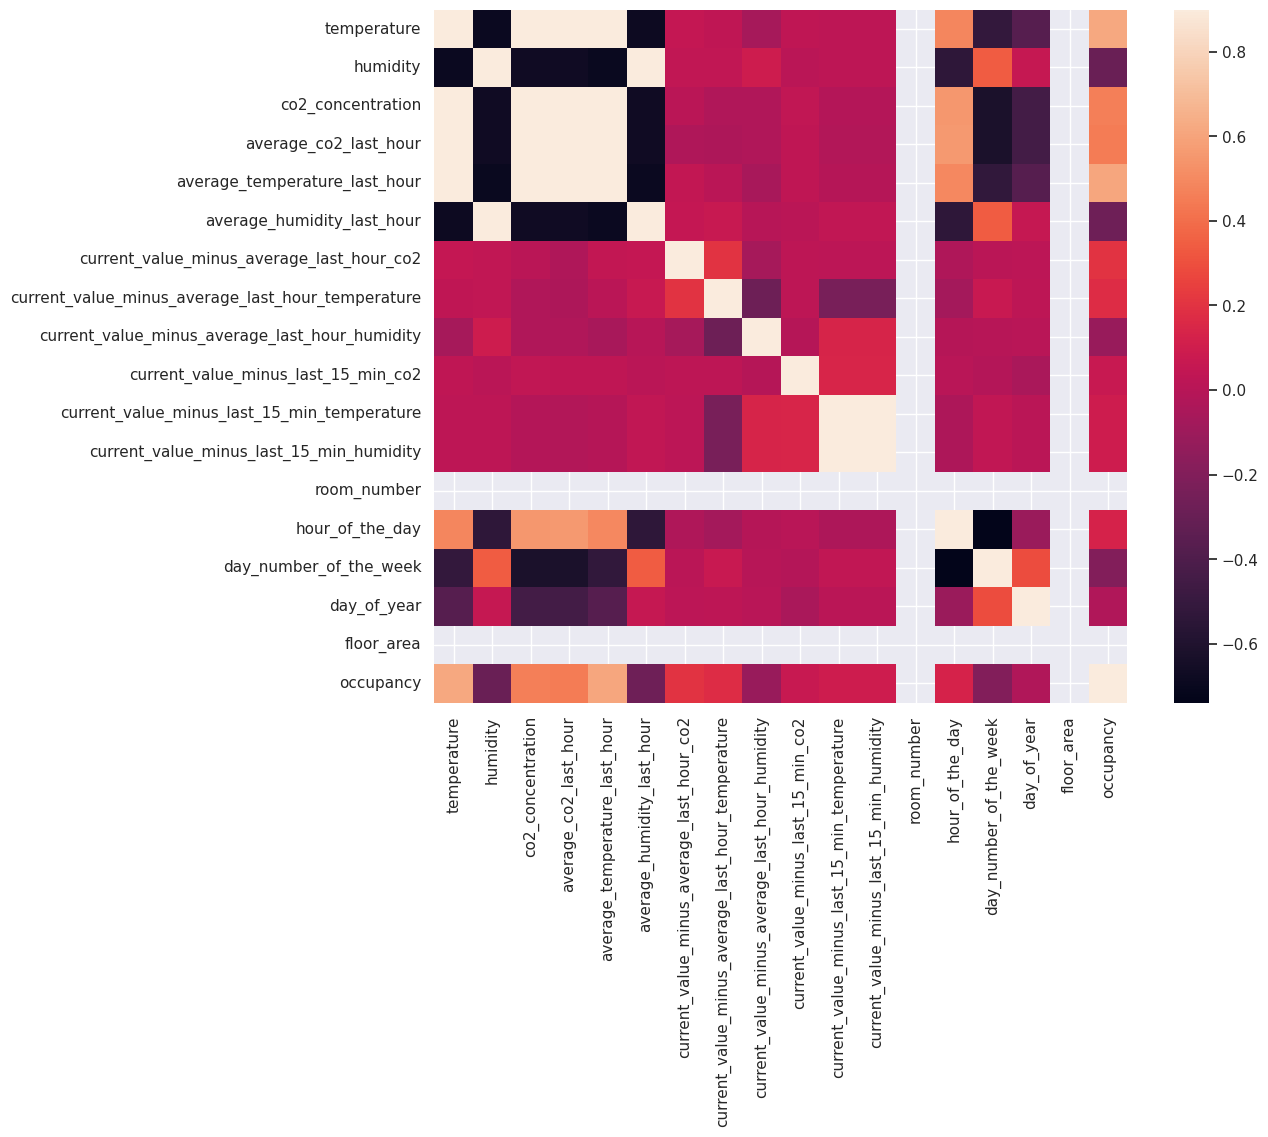

In [ ]:
plot_tera_df = tera_df.drop(['datetime'], axis=1)
plt.figure(figsize = (12,9))
sns.heatmap(plot_tera_df.corr(), vmax = 0.9, square = True)

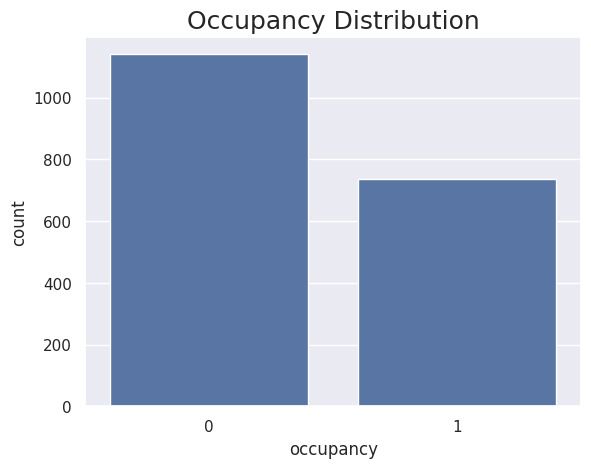

In [ ]:
sns.set(style="darkgrid")
plt.title("Occupancy Distribution", fontdict={'fontsize':18})
ax = sns.countplot(x="occupancy", data=tera_df)

In [ ]:
def average_feature(data_frame, window):

# Calculate the rolling mean for each feature excluding the current index
    data_frame['average_co2_last_hour'] = data_frame['co2_concentration'].shift(1).rolling(window=window).mean()
    data_frame['average_temperature_last_hour'] = data_frame['temperature'].shift(1).rolling(window=window).mean()
    data_frame['average_humidity_last_hour'] = data_frame['humidity'].shift(1).rolling(window=window).mean()
    # Fill NaN values with the corresponding original values
    data_frame['average_co2_last_hour'] = data_frame['average_co2_last_hour'].fillna(data_frame['co2_concentration'])
    data_frame['average_temperature_last_hour'] = data_frame['average_temperature_last_hour'].fillna(data_frame['temperature'])
    data_frame['average_humidity_last_hour'] = data_frame['average_humidity_last_hour'].fillna(data_frame['humidity'])

    return data_frame

def current_minus_avg_last_hour(data_frame):
    data_frame['current_value_minus_average_last_hour_co2'] = data_frame['co2_concentration'] - data_frame['average_co2_last_hour']
    data_frame['current_value_minus_average_last_hour_temperature'] = data_frame['temperature'] - data_frame['average_temperature_last_hour']
    data_frame['current_value_minus_average_last_hour_humidity'] = data_frame['humidity'] -  data_frame['average_humidity_last_hour']
    return data_frame

def current_minus_last_measure(data_frame):
    data_frame["current_value_minus_last_15_min_co2"] = data_frame["co2_concentration"] - data_frame["co2_concentration"].shift(1)
    data_frame["current_value_minus_last_15_min_temperature"] = data_frame["temperature"] - data_frame["temperature"].shift(1)
    data_frame["current_value_minus_last_15_min_humidity"] = data_frame["humidity"] - data_frame["humidity"].shift(1)
    #fill NaN with 0
    data_frame["current_value_minus_last_15_min_co2"] = data_frame["current_value_minus_last_15_min_co2"].fillna(0)
    data_frame["current_value_minus_last_15_min_temperature"] = data_frame["current_value_minus_last_15_min_temperature"].fillna(0)
    data_frame["current_value_minus_last_15_min_humidity"] = data_frame["current_value_minus_last_15_min_humidity"].fillna(0)
    return data_frame

def room_number(data_frame, room_num):
    data_frame["room_number"] = room_num
    return data_frame

def time_features(data_frame):
    data_frame['hour_of_the_day'] = data_frame['datetime'].dt.hour
    data_frame['day_number_of_the_week'] = data_frame['datetime'].dt.dayofweek + 1 # We count from 1 to 7
    data_frame['day_of_year'] = data_frame['datetime'].dt.dayofyear
    return data_frame

def floor_area(data_frame, area):
    data_frame["floor_area"] = area
    return data_frame


In [ ]:
def add_features(data_frame, avg_window = 4, area = 10, room_num = 0, all_features = True):

  data_frame = average_feature(data_frame, avg_window)
  data_frame = current_minus_avg_last_hour(data_frame)
  data_frame = current_minus_last_measure(data_frame)
  if all_features:
    data_frame = room_number(data_frame, room_num)
    data_frame = time_features(data_frame)
    data_frame = floor_area(data_frame, area)

  return data_frame

## Augment data with noise

In [ ]:
def reorder_data_frame(data_frame, colomns):
  data_frame = data_frame[colomns]
  return data_frame

In [ ]:
def add_noise(df, noise_level=0.1):
    noisy_df = df.copy()
    for col in df.columns:
        if col not in ['datetime','hour_of_the_day', 'day_number_of_the_week', 'day_of_year', 'room_number', "floor_area"]:
            noise = np.random.normal(0, noise_level, df[col].shape)
            noisy_df[col] += noise
    return noisy_df

In [ ]:
def extract_noisy_df(tera_df):

  tera_df_occupancy_1 = tera_df[tera_df['occupancy'] == 1]
  tera_df_occupancy_0 = tera_df[tera_df['occupancy'] == 0]
  X_tera_df_occupancy_1 = tera_df_occupancy_1.drop(['occupancy'], axis=1)
  y_tera_df_occupancy_1 = tera_df_occupancy_1['occupancy']
  X_tera_df_occupancy_0 = tera_df_occupancy_0.drop(['occupancy'], axis=1)
  y_tera_df_occupancy_0 = tera_df_occupancy_0['occupancy']

  #
  noisy_X_tera_df_occupancy_1 = X_tera_df_occupancy_1[["datetime","temperature", "humidity", "co2_concentration",'hour_of_the_day', 'day_number_of_the_week', 'day_of_year', 'room_number', "floor_area"]]
  noisy_X_tera_df_occupancy_1.reset_index(drop=True, inplace=True)
  noisy_X_tera_df_occupancy_0 = X_tera_df_occupancy_0[["datetime","temperature", "humidity", "co2_concentration",'hour_of_the_day', 'day_number_of_the_week', 'day_of_year', 'room_number', "floor_area"]]
  noisy_X_tera_df_occupancy_0.reset_index(drop=True, inplace=True)

  return noisy_X_tera_df_occupancy_1, noisy_X_tera_df_occupancy_0

In [ ]:
X_tera = tera_df.drop(['occupancy'], axis=1)
y_tera = tera_df['occupancy']

X_train_tera, X_test_tera, y_train_tera, y_test_tera = train_test_split(X_tera, y_tera, test_size=0.5, random_state=11)

print(f"Tera train size: {X_train_tera.shape[0]}")
print(f"Tera test size: {X_test_tera.shape[0]}")

tera_df_to_be_augmented = X_train_tera.copy()
tera_df_to_be_augmented['occupancy'] = y_train_tera
tera_df_to_be_augmented = tera_df_to_be_augmented.sort_values(by='datetime').reset_index(drop=True)

Tera train size: 1126
Tera test size: 752


In [ ]:
tera_df_to_be_augmented = pd.read_csv('/content/sample_data/augmented_tera.csv')

In [ ]:
noisy_X_tera_df_occupancy_1, noisy_X_tera_df_occupancy_0 = extract_noisy_df(tera_df_to_be_augmented)

In [ ]:
def augment_data_with_noise(tera_df, noisy_X_tera_df_occupancy_1, noisy_X_tera_df_occupancy_0, noise_factors, add_noise, add_features, reorder_data_frame, columns):
    """
    Augments the data with noise while respecting time features.

    Parameters:
    tera_df (DataFrame): The original DataFrame.
    noisy_X_tera_df_occupancy_1 (DataFrame): DataFrame of occupancy 1 to be augmented.
    noisy_X_tera_df_occupancy_0 (DataFrame): DataFrame of occupancy 0 to be augmented.
    noise_factors (list): List of noise factors to apply.
    add_noise (function): Function to add noise to the data.
    add_features (function): Function to add features to the DataFrame.
    reorder_data_frame (function): Function to reorder DataFrame columns.
    columns (list): List of columns for reordering.

    Returns:
    DataFrame: Augmented DataFrame with noise.
    """

    # List to store augmented dataframes
    all_noisy_data = []

    for noise_factor in noise_factors:
        # Group by time features
        noisy_X_tera_df_occupancy_1_grouped = noisy_X_tera_df_occupancy_1.groupby(['hour_of_the_day', 'day_number_of_the_week', 'day_of_year'])
        noisy_X_tera_df_occupancy_0_grouped = noisy_X_tera_df_occupancy_0.groupby(['hour_of_the_day', 'day_number_of_the_week', 'day_of_year'])

        # Apply noise function to each group and collect the results
        noisy_tera_df_occupancy_1 = pd.concat([add_noise(group, noise_factor) for _, group in noisy_X_tera_df_occupancy_1_grouped])
        noisy_tera_df_occupancy_0 = pd.concat([add_noise(group, noise_factor) for _, group in noisy_X_tera_df_occupancy_0_grouped])
        noisy_tera_df_occupancy_1["occupancy"] = 1
        noisy_tera_df_occupancy_0["occupancy"] = 0

        # Combine augmented data
        noisy_tera_df = pd.concat([noisy_tera_df_occupancy_1, noisy_tera_df_occupancy_0])

        # Sort by datetime
        noisy_tera_df = noisy_tera_df.sort_values(by='datetime').reset_index(drop=True)

        # Check if they are ordered the same way
        different = (noisy_tera_df["datetime"] == tera_df["datetime"]).any() == False
        print(f'Noisy df and original tera df are temporally misaligned: {different}')

        # Add to the list of augmented dataframes
        all_noisy_data.append(noisy_tera_df)

    # Combine all augmented dataframes
    all_noisy_data = pd.concat(all_noisy_data).reset_index(drop=True)

    # Add features and reorder dataframe
    all_noisy_data = add_features(all_noisy_data, all_features=False)
    all_noisy_data = reorder_data_frame(all_noisy_data, columns)

    return all_noisy_data

In [ ]:
columns = ['datetime','temperature','humidity','co2_concentration','average_co2_last_hour','average_temperature_last_hour',
           'average_humidity_last_hour','current_value_minus_average_last_hour_co2','current_value_minus_average_last_hour_temperature',
           'current_value_minus_average_last_hour_humidity','current_value_minus_last_15_min_co2','current_value_minus_last_15_min_temperature',
           'current_value_minus_last_15_min_humidity','room_number','hour_of_the_day','day_number_of_the_week','day_of_year','floor_area','occupancy']
# Define the noise factors
noise_factors = [0.5, 1, 1.5]

In [ ]:
noisy_data = augment_data_with_noise(tera_df_to_be_augmented, noisy_X_tera_df_occupancy_1, noisy_X_tera_df_occupancy_0, noise_factors, add_noise, add_features, reorder_data_frame, columns)

# Combine original and noisy data
augmented_tera_df = pd.concat([noisy_data, tera_df_to_be_augmented]).sort_values(by='datetime').reset_index(drop=True)

Noisy df and original tera df are temporally misaligned: False
Noisy df and original tera df are temporally misaligned: False
Noisy df and original tera df are temporally misaligned: False


## Add Acceleration Feature

In [ ]:
def calculate_acceleration(data_frame):
    # Second difference (acceleration)
    data_frame['acceleration_co2'] = data_frame['current_value_minus_last_15_min_co2'].diff()
    data_frame['acceleration_temperature'] = data_frame['current_value_minus_last_15_min_temperature'].diff()
    data_frame['acceleration_humidity'] = data_frame['current_value_minus_last_15_min_humidity'].diff()

    # Fill NaN with 0 (optional, depends on use case)
    data_frame['acceleration_co2'] = data_frame['acceleration_co2'].fillna(0)
    data_frame['acceleration_temperature'] = data_frame['acceleration_temperature'].fillna(0)
    data_frame['acceleration_humidity'] = data_frame['acceleration_humidity'].fillna(0)



    return data_frame

In [ ]:
acceleration_columns = ['datetime','temperature','humidity','co2_concentration','average_co2_last_hour','average_temperature_last_hour',
           'average_humidity_last_hour','current_value_minus_average_last_hour_co2','current_value_minus_average_last_hour_temperature',
           'current_value_minus_average_last_hour_humidity','current_value_minus_last_15_min_co2','current_value_minus_last_15_min_temperature',
           'current_value_minus_last_15_min_humidity','acceleration_co2','acceleration_temperature','acceleration_humidity','room_number','hour_of_the_day','day_number_of_the_week','day_of_year','floor_area','occupancy']

### augmented tera acceleration

In [ ]:
augmented_tera_acceleration_df = calculate_acceleration(augmented_tera_df)
augmented_tera_acceleration_df = reorder_data_frame(augmented_tera_acceleration_df, acceleration_columns)
augmented_tera_acceleration_df.head()

,datetime,temperature,humidity,co2_concentration,average_co2_last_hour,average_temperature_last_hour,average_humidity_last_hour,current_value_minus_average_last_hour_co2,current_value_minus_average_last_hour_temperature,current_value_minus_average_last_hour_humidity,...,current_value_minus_last_15_min_humidity,acceleration_co2,acceleration_temperature,acceleration_humidity,room_number,hour_of_the_day,day_number_of_the_week,day_of_year,floor_area,occupancy
0,02-02-23 11:45,27.535315,56.147021,1523.951162,1523.951162,27.535315,56.147021,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0,11,6,33,10,0
1,02-02-23 11:45,28.294696,56.895562,1525.704781,1256.245027,26.555576,54.579689,269.459755,1.739120,2.315873,...,3.503315,272.552199,2.427269,3.503315,0,11,6,33,10,0
2,02-02-23 11:45,28.402808,56.779702,1525.335213,1255.136570,26.503889,55.644753,270.198643,1.898919,1.134948,...,1.040269,-0.771976,-0.503355,-2.463046,0,11,6,33,10,0
3,02-02-23 11:45,27.200000,56.400000,1524.000000,1523.980000,27.220000,56.370000,0.000000,0.000000,0.000000,...,0.000000,-271.780223,-1.923914,-1.040269,0,11,6,33,10,0
4,02-02-23 11:46,26.178277,57.426237,1517.663554,1322.680844,26.660152,54.989276,194.982709,-0.481875,2.436961,...,0.530675,-8.041228,-2.116419,0.530675,0,11,6,33,10,0


In [ ]:
augmented_tera_acceleration_df.to_csv('augmented_tera_acceleration.csv', index=False)

### test tera acceleration

In [ ]:
test_tera_df = pd.read_csv('/content/sample_data/test_tera.csv')
test_tera_acceleration_df = calculate_acceleration(test_tera_df)
test_tera_acceleration_df = reorder_data_frame(test_tera_acceleration_df, acceleration_columns)
test_tera_acceleration_df.head()

,datetime,temperature,humidity,co2_concentration,average_co2_last_hour,average_temperature_last_hour,average_humidity_last_hour,current_value_minus_average_last_hour_co2,current_value_minus_average_last_hour_temperature,current_value_minus_average_last_hour_humidity,...,current_value_minus_last_15_min_humidity,acceleration_co2,acceleration_temperature,acceleration_humidity,room_number,hour_of_the_day,day_number_of_the_week,day_of_year,floor_area,occupancy
0,02-02-23 11:47,26.9,57.0,1510.3,1510.34,26.93,57.00,0.00,0.00,0.00,...,-0.13,0.00,0.00,0.00,0,11,6,33,10,0
1,02-02-23 11:50,26.6,57.5,1360.8,1497.56,26.89,57.06,-34.57,-0.13,0.29,...,-0.13,-94.35,0.00,0.00,0,11,6,33,10,0
2,02-02-23 11:57,26.4,57.8,1232.5,1230.41,26.50,57.70,-0.91,-0.07,0.12,...,0.03,105.09,0.16,0.16,0,11,6,33,10,0
3,02-02-23 12:06,26.5,57.4,1226.6,1227.97,26.50,57.45,-1.37,0.03,-0.10,...,-0.04,-2.99,-0.07,-0.07,0,12,6,33,10,0
4,02-02-23 12:07,26.5,57.4,1225.5,1227.05,26.51,57.41,-0.49,-0.01,0.01,...,-0.03,-1.04,0.01,0.01,0,12,6,33,10,0


In [ ]:
test_tera_acceleration_df.to_csv('test_tera_acceleration.csv', index=False)

### augmented tera x4 acceleration

In [ ]:
augmented_tera_x4_df = pd.read_csv('/content/sample_data/augmented_tera_x4.csv')
augmented_tera_x4_acceleration_df = calculate_acceleration(augmented_tera_x4_df)
augmented_tera_x4_acceleration_df = reorder_data_frame(augmented_tera_x4_acceleration_df, acceleration_columns)
augmented_tera_x4_acceleration_df.head()

,datetime,temperature,humidity,co2_concentration,average_co2_last_hour,average_temperature_last_hour,average_humidity_last_hour,current_value_minus_average_last_hour_co2,current_value_minus_average_last_hour_temperature,current_value_minus_average_last_hour_humidity,...,current_value_minus_last_15_min_humidity,acceleration_co2,acceleration_temperature,acceleration_humidity,room_number,hour_of_the_day,day_number_of_the_week,day_of_year,floor_area,occupancy
0,02-02-23 11:45,27.994529,56.549964,1524.397030,1524.397030,27.994529,56.549964,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0,11,6,33,10,0
1,02-02-23 11:45,28.124626,57.348771,1524.858772,1388.675468,27.825949,56.101972,136.183304,0.298677,1.246799,...,-0.154298,-0.702237,-1.513764,-0.154298,0,11,6,33,10,0
2,02-02-23 11:45,27.767201,56.272264,1525.043678,1457.210062,28.102007,56.845343,67.833615,-0.334806,-0.573079,...,-1.076507,0.887143,1.156338,-0.922209,0,11,6,33,10,0
3,02-02-23 11:45,25.565282,55.541386,1523.555491,1252.166373,26.460336,54.761179,271.389119,-0.895055,0.780207,...,0.249639,270.906993,-1.886907,1.326146,0,11,6,33,10,0
4,02-02-23 11:45,31.748447,59.783253,1524.867401,1319.587159,27.001682,55.304517,205.280242,4.746766,4.478737,...,4.241868,-269.779989,8.427497,3.992229,0,11,6,33,10,0


In [ ]:
augmented_tera_x4_acceleration_df.to_csv('augmented_tera_x4_acceleration.csv', index=False)

### tera acceleration

In [ ]:
tera_acceleration_df = calculate_acceleration(tera_df)
tera_acceleration_df = reorder_data_frame(tera_acceleration_df, acceleration_columns)
tera_acceleration_df.head()

,datetime,temperature,humidity,co2_concentration,average_co2_last_hour,average_temperature_last_hour,average_humidity_last_hour,current_value_minus_average_last_hour_co2,current_value_minus_average_last_hour_temperature,current_value_minus_average_last_hour_humidity,...,current_value_minus_last_15_min_humidity,acceleration_co2,acceleration_temperature,acceleration_humidity,room_number,hour_of_the_day,day_number_of_the_week,day_of_year,floor_area,occupancy
0,02-02-23 11:45,27.2,56.4,1524.0,1523.98,27.22,56.37,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0,11,6,33,10,0
1,02-02-23 11:46,27.1,56.7,1518.1,1518.13,27.06,56.73,0.00,0.00,0.00,...,-0.17,-5.85,-0.17,-0.17,0,11,6,33,10,0
2,02-02-23 11:47,26.9,57.0,1510.3,1510.34,26.93,57.00,0.00,0.00,0.00,...,-0.13,-1.94,0.04,0.04,0,11,6,33,10,0
3,02-02-23 11:48,26.8,57.1,1498.8,1498.79,26.82,57.15,0.00,0.00,0.00,...,-0.11,-3.76,0.02,0.02,0,11,6,33,10,0
4,02-02-23 11:49,26.8,57.3,1463.0,1512.81,27.01,56.81,-14.02,-0.19,0.33,...,-0.06,-24.25,0.05,0.05,0,11,6,33,10,0


In [ ]:
tera_acceleration_df.to_csv('tera_acceleration.csv', index=False)

### room_occ acceleration

In [ ]:
room_occ_df = pd.read_csv('/content/sample_data/room_occupancy_detection_data.csv')
room_occ_acceleration_df = calculate_acceleration(room_occ_df)
room_occ_acceleration_df = reorder_data_frame(room_occ_acceleration_df, acceleration_columns)
room_occ_acceleration_df.head()

In [ ]:
room_occ_acceleration_df.to_csv('room_occupancy_acceleration.csv', index=False)

,datetime,temperature,humidity,co2_concentration,average_co2_last_hour,average_temperature_last_hour,average_humidity_last_hour,current_value_minus_average_last_hour_co2,current_value_minus_average_last_hour_temperature,current_value_minus_average_last_hour_humidity,...,current_value_minus_last_15_min_humidity,acceleration_co2,acceleration_temperature,acceleration_humidity,room_number,hour_of_the_day,day_number_of_the_week,day_of_year,floor_area,occupancy
0,30-01-23 00:00,20.4,37.5,637.1,637.10,20.40,37.50,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,1,0,1,30,16,0
1,30-01-23 00:15,20.4,37.6,637.6,637.60,20.40,37.60,0.00,0.00,0.00,...,0.1,0.5,0.0,0.1,1,0,1,30,16,0
2,30-01-23 00:30,20.4,37.6,629.0,629.00,20.40,37.60,0.00,0.00,0.00,...,0.0,-9.1,0.0,-0.1,1,0,1,30,16,0
3,30-01-23 00:45,20.5,39.1,790.2,790.20,20.50,39.10,0.00,0.00,0.00,...,1.5,169.8,0.1,1.5,1,0,1,30,16,0
4,30-01-23 01:00,20.6,39.7,861.7,673.48,20.43,37.95,188.23,0.18,1.75,...,0.6,-89.7,0.0,-0.9,1,1,1,30,16,1


# Create CSV files

In [ ]:
augmented_tera_df.to_csv('train_augmented_tera.csv', index=False)

In [ ]:
test_tera_df = X_test_tera.copy()
test_tera_df['occupancy'] = y_test_tera
test_tera_df = test_tera_df.sort_values(by='datetime').reset_index(drop=True)
test_tera_df.to_csv('test_tera.csv', index=False)